## Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from ipywidgets import interact,fixed

In [2]:
def plot_svc(model, ax = None, plot_support = True):
    """Plot de la función de decission para una clasificacion en 2D con SVC """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    xy =  np.vstack([X.ravel(), Y.ravel()]).T #T genera una tupla
    P = model.decision_function(xy).reshape(X.shape) # recorta los datos para que tengan la dimension apropiada
    
    ## Representamos las fronteras y los margenes del SVC
    ax.contour (X,Y,P,colors="k",levels=[-1,0,1],alpha = 0.5, linestyles = ["--","-","--"])
    
    if(plot_support):
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s = 300, linewidth=1, facecolors="blue")
    
    ax.set_xlim(xlim)# por seguridad de que los limites no se vean afectados
    ax.set_ylim(ylim)# por seguridad de que los limites no se vean afectados

In [3]:
X, Y = make_circles(100, factor = .1,noise= .1)

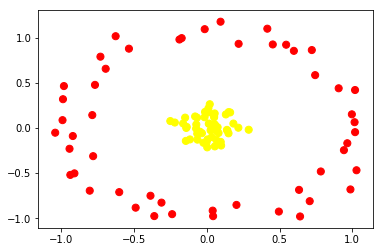

In [4]:
plt.scatter(X[:,0],X[:,1], c= Y, s = 50, cmap = "autumn")

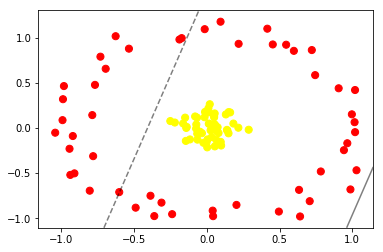

In [5]:
plt.scatter(X[:,0],X[:,1], c= Y, s = 50, cmap = "autumn")
plot_svc(SVC(kernel="linear").fit(X,Y), plot_support= False)

In [6]:
r = np.exp(-(X**2).sum(1))
r

array([0.96814053, 0.97963855, 0.95979336, 0.97113212, 0.99745756,
       0.95668702, 0.38745358, 0.36173351, 0.99455291, 0.99066243,
       0.97945677, 0.96487601, 0.9746931 , 0.33505856, 0.97106775,
       0.93317911, 0.3996692 , 0.95246848, 0.97328457, 0.33660529,
       0.23847482, 0.29926013, 0.24892293, 0.42922754, 0.99442646,
       0.98019042, 0.33810634, 0.39729512, 0.33940259, 0.99586649,
       0.98215745, 0.94916564, 0.99737872, 0.36154536, 0.23737749,
       0.37928206, 0.33936601, 0.95407256, 0.33169813, 0.278745  ,
       0.24567684, 0.94752731, 0.31652123, 0.98536801, 0.36079231,
       0.35319068, 0.42474253, 0.25341926, 0.46366609, 0.38254743,
       0.97534995, 0.99565602, 0.97120749, 0.98331202, 0.35489683,
       0.94558975, 0.99546093, 0.95400534, 0.96473117, 0.30645166,
       0.34381622, 0.99566842, 0.97709817, 0.45771153, 0.9798875 ,
       0.38385684, 0.29616774, 0.99618421, 0.49280226, 0.99876596,
       0.37096492, 0.41806813, 0.98432807, 0.93173963, 0.96803

In [7]:
def plot_3D(elev = 30, azim= 30, X=X, Y=Y,r=r):
    ax= plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1], r, c= Y, s = 50, cmap = "autumn")
    ax.view_init(elev=elev, azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [8]:
interact(plot_3D, elev = [-90,-60,-30,0,30,60,90], 
         azim =[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X = fixed(X), Y= fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.0122907 ,  0.17951869],
       [-0.06453443, -0.12808946],
       [-0.14429394, -0.14218482],
       [-0.1160534 , -0.12579494],
       [ 0.01340912,  0.04864029],
       [ 0.05488671, -0.20314142],
       [ 0.9424429 , -0.24486857],
       [ 0.90632797,  0.44206009],
       [-0.07369178, -0.00561217],
       [ 0.08041434, -0.05399053],
       [ 0.14151571, -0.02702747],
       [-0.14917572,  0.11619932],
       [ 0.14920966, -0.05804401],
       [ 0.59834302,  0.85757541],
       [ 0.05391815,  0.16264032],
       [-0.25105043,  0.07830583],
       [-0.69518274,  0.65866457],
       [ 0.01105504,  0.22039975],
       [-0.02354354, -0.16286336],
       [-1.04222538, -0.05109354],
       [-0.62677396,  1.02012057],
       [-0.01455581,  1.09828512],
       [ 0.41587023,  1.10347809],
       [ 0.78358531, -0.48141684],
       [ 0.07415705,  0.00947973],
       [-0.14143994,  0.00178003],
       [-0.36111812, -0.97672337],
       [

### En este ejemplo se uso la elevacion de r al cuadrado mas 1 para intuir o crear otra dimension que agregandola a la grafica muestra en donde se podria hacer la division 0.7 aprox

## Pero la mejor solucion

No siempre buscar un kernel lineal 

rbf = radial basic function

Este kernel busca formas circulares que separen nuestros datos

In [9]:
rbf = SVC(kernel="rbf", C = 1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

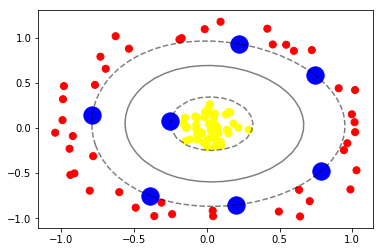

In [10]:
plt.scatter(X[:,0],X[:,1], c = Y, s= 50, cmap="autumn")
plot_svc(rbf)
#plt.scatter(rbf.support_vectors_[:,0],
#            rbf.support_vectors_[:,1],
#            s= 200, lw = 1,
#            facecolors = "blue")

## Ajsutar los parametros de SVM

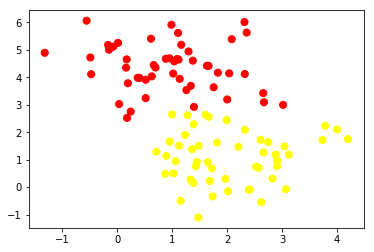

In [13]:
X, Y = make_blobs(n_samples= 100, centers = 2, random_state =0, cluster_std = 0.9)
plt.scatter(X[:,0],X[:,1], c = Y, s= 50, cmap="autumn")

## Acontinuacion se ve la diferencia entre las dos variables permisivas del error (C)

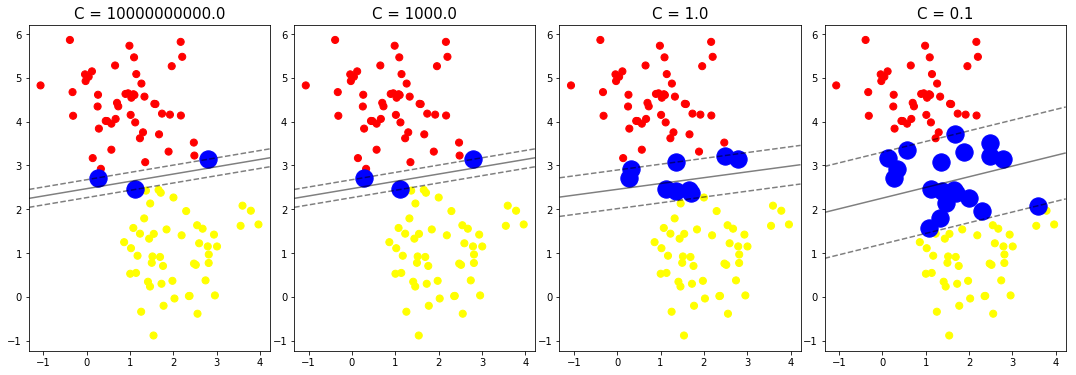

In [30]:
fig, ax = plt.subplots(1,4, figsize = (16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax,[1E10,1000,1,0.1]):
    model = SVC(kernel = "linear", C = C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plot_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

### Repetimos el experimento ahora con valores cruzados (cluster_std)

Como los metodos se cruzan es mas probable que algunos puntos se clasifiquen en u grupo incorrecto

Ademas es mas tardado

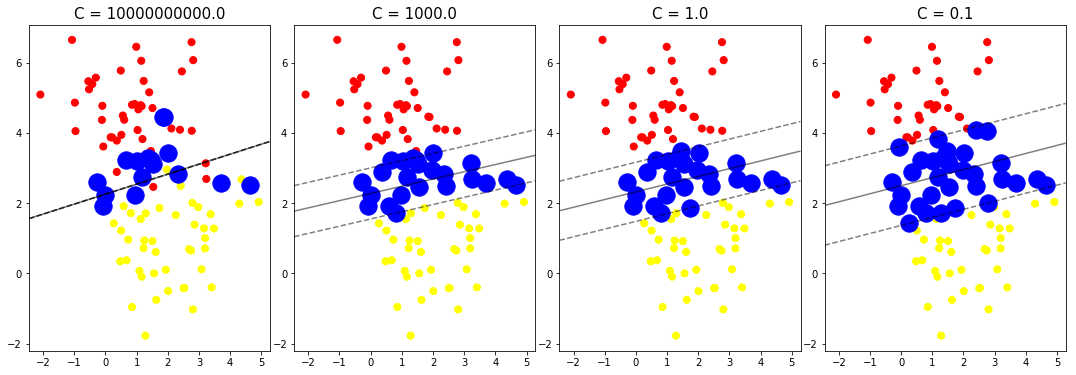

In [33]:
X, Y = make_blobs(n_samples= 100, centers = 2, random_state =0, cluster_std = 1.2)
fig, ax = plt.subplots(1,4, figsize = (16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax,[1E10,1000,1,0.1]):
    model = SVC(kernel = "linear", C = C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plot_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

# Para encontrar C optimo se puede usar una validacion cruzada o proceso similar para ajustar los hiperparametros y validar que l modelo sea correcto

Entre mas alta la C mas corto el error

Jugar con la variable es una de las tareas duras de mi proxima profecion Data Science